**Set up work**

Imports, read data file, etc.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.ensemble
import sklearn.tree

# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_house_data = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/kc_house_data.csv", index_col="id")

print(f"Read {len(df_house_data)} recods.")
print(df_house_data.columns)

# show descriptive statistics
# print(df_house_data.describe())


Read 21613 recods.
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')
              price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04      1.494309      0.007542      0.234303      3.409430      7.656873   1788.390691     291.

Helper functions...

In [4]:
def plot_model(model, features, target):
    '''Helper function to plot actual vs predicted outcomes.'''
    
    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]

    # run the model, get score and max
    model_predictions = model.predict(features)
    model_score = model.score(features, target)
    max_value = model_predictions.max()

    # plot the prediction line and predictions vs actuals
    plt.plot([0, max_value], [0, max_value], label="actual=predicted", color="red")
    plt.scatter(model_predictions, target, color="blue", alpha=0.3)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Actual vs Predicted  (R^2 = {model_score:.2f})")
    plt.show()

def show_model_details(model, features, target):
    '''Helper function to show the model's details:'''

    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]

    model_score = model.score(features, target)
    print(f"{model_name}")
    print(f"R^2 = {model_score:.2f}")
    
    if 'coef_' in dir(model):
        # show the coefficients and intercept of this regression
        df_coef = pd.DataFrame(model.coef_, features.columns, columns=['Coefficients'])
        df_coef['Mean'] = features.mean()
        df_coef['Contribution'] = df_coef['Coefficients'] * df_coef['Mean']
        df_coef.loc['intercept', 'Coefficients'] = model.intercept_ 
        print(df_coef)

**Regression**
- Linear regression model
- Plot predicted vs actual
- Try some different regession models

Using features: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], dtype='object')
sklearn.linear_model._base.LinearRegression
R^2 = 0.60
                Coefficients          Mean   Contribution
bedrooms       -28342.700919      3.361281  -95267.791641
bathrooms      -17742.700988      2.107765  -37397.437476
sqft_living       106.925402   2069.033101  221232.196155
sqft_lot            0.091611  15097.535515    1383.107492
floors          11002.615380      1.493199   16429.090984
waterfront     386733.265000      0.006546    2531.540871
view            58487.255005      0.228923   13389.074022
condition       54599.303759      3.409331  186147.124890
grade          102038.229389      7.648189  780407.705942
sqft_above         34.477471   1780.925162   61401.796309
sqft_basement      72.447931    288.107939   20872.823976
sqft_living15      33.421366   1982.59182

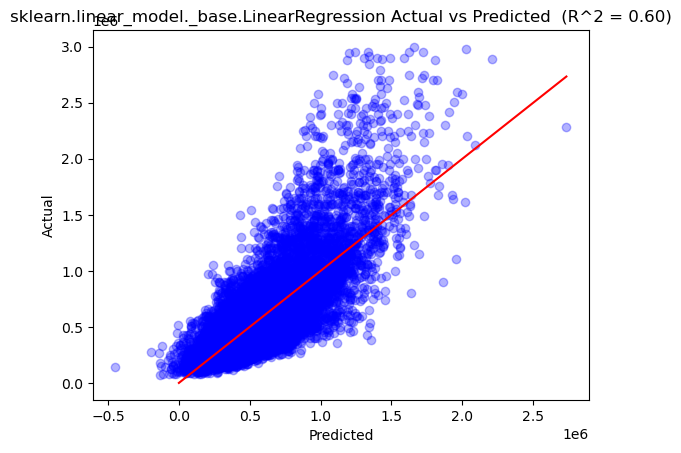

In [13]:
# remove some outliers:
df_house_data_cleaned = df_house_data.query('bedrooms <= 7').query('price < 3000000')

target = df_house_data_cleaned['price']
# # try with just a few columns, add and re-run the model
# features = df_house_data[[ 'bedrooms']]
# features = df_house_data_cleaned[['sqft_living', 'bedrooms', 'bathrooms', ]]
features = df_house_data_cleaned.drop(columns=['date', 'yr_built', 'yr_renovated', 
                                        'zipcode','lat', 'long', 'price',], axis=1)
print(f'Using features: {features.columns}')

# # linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(features, target)

# gradient boosting regression model
# model = sklearn.ensemble.GradientBoostingRegressor()
# model.fit(features, target)

# model = sklearn.ensemble.HistGradientBoostingRegressor()
# model.fit(features, target)

# model = sklearn.tree.DecisionTreeRegressor()
# model.fit(features, target)

show_model_details(model, features, target)
plot_model(model, features, target)




Model Validation
- split the data set into subsets for training and testing


In [ ]:
# example with np.array
from sklearn.model_selection import train_test_split

X = np.arange(10).reshape((5,2))
print("X = ") 
print(X)
y = np.arange(5).reshape((5,1))
print("y = ") 
print(y)

# split up the data into "training" and "test" data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train = ")
print(X_train)
print("y_train = ")
print(y_train)


X = 
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y = 
[[0]
 [1]
 [2]
 [3]
 [4]]
X_train = 
[[4 5]
 [0 1]
 [6 7]]
y_train = 
[[2]
 [0]
 [3]]


Example with housing DataFrame

In [37]:
# remove some outliers:
df_house_data_cleaned = df_house_data.query('bedrooms <= 7').query('price < 3000000')

target = df_house_data_cleaned['price']
# # try with just a few columns, add and re-run the model
# features = df_house_data_cleaned[[ 'bedrooms']]
# features = df_house_data_cleaned[['sqft_living', 'bedrooms', 'bathrooms', ]]
features = df_house_data_cleaned.drop(columns=['date', 'yr_built', 'yr_renovated', 
                                        'zipcode','lat', 'long', 'price',], axis=1)

# split up the data into "training" and "test" data
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                    test_size=0.2, random_state=42)

print(f'train_features.shape={train_features.shape} train_target.shape={train_target.shape}')
print(f'test_features.shape={test_features.shape} test_target.shape={test_target.shape}')

# build regression model using the training data
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(train_features, train_target)
score = linear_model.score(train_features, train_target)
print(f'linear_model.score = {score:.2f} (training data)')
score = linear_model.score(test_features, test_target)
print(f'linear_model.score = {score:.2f} (test data)')
# show_model_details(linear_model, train_features, train_target)

# let's try with a decision tree regression model
decision_tree_model = sklearn.tree.DecisionTreeRegressor()
decision_tree_model.fit(train_features, train_target)
score = decision_tree_model.score(train_features, train_target)
print(f'decision_tree_model.score = {score:.5f} (training data)')
score = decision_tree_model.score(test_features, test_target)
print(f'decision_tree_model.score = {score:.5f} (test data)')




train_features.shape=(17232, 13) train_target.shape=(17232,)
test_features.shape=(4308, 13) test_target.shape=(4308,)
linear_model.score = 0.60 (training data)
linear_model.score = 0.59 (test data)
decision_tree_model.score = 0.99917 (training data)
decision_tree_model.score = 0.44019 (test data)


**Cross Validation of models:** 
cross_validate performs cross-validation by splitting the data into multiple folds, 
training the model on a subset of the folds, and evaluating it on the remaining fold.
 This process is repeated for each fold, and the results are aggregated to provide a 
 comprehensive evaluation.

In [47]:
from sklearn.model_selection import cross_validate

print("Cross-validation on the linear model:")
linear_model_cv = cross_validate(linear_model, features, target, cv=10)
print(linear_model_cv['test_score'])
print("linear_model mean R^2: ", linear_model_cv['test_score'].mean())

print("Cross-validation on the decision-tree model:")
decision_tree_model_cv = cross_validate(decision_tree_model, features, target, cv=10)
print(decision_tree_model_cv['test_score'])
print("decision_tree_model mean R^2: ", decision_tree_model_cv['test_score'].mean())


Cross-validation on the linear model:
[0.5899006  0.60052438 0.59284887 0.58345688 0.57934969 0.602472
 0.60133328 0.6117642  0.6023091  0.59220239]
linear_model mean R^2:  0.5956161383793128
Cross-validation on the decision-tree model:
[0.36307704 0.42511839 0.42731357 0.35954642 0.30368547 0.38047596
 0.42684891 0.39970415 0.42822714 0.39068932]
decision_tree_model mean R^2:  0.39046863742617094
